In [1]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from mlxtend.frequent_patterns import apriori, association_rules
from textblob import TextBlob
from scipy.stats import pearsonr

import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
import torch.nn as nn
from tqdm import tqdm

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\collegereview2021.csv")


In [3]:
df_subset = df.head(3000)

In [100]:
# Additional keywords for Placement
placement_keywords = [
    'placement', 'job', 'career', 'recruitment', 'employment', 'internship',
    'opportunity', 'hiring', 'company', 'interview', 'salary', 'job market',
    'professional development', 'workplace', 'job satisfaction', 'alumni success',
    'industry connection', 'placement cell', 'placement record', 'job placement',
    'career services', 'job offer', 'job search', 'corporate relations', 'graduate employment',
    'work experience', 'job security', 'career growth', 'placement assistance', 'placement program'
]

# Additional keywords for Campus Life
campus_life_keywords = [
    'campus life', 'student life', 'extracurricular', 'clubs', 'events', 'activities',
    'social life', 'student organizations', 'community', 'cultural events', 'sports',
    'festivals', 'student engagement', 'recreation', 'friendship', 'student diversity',
    'leadership opportunities', 'co-curricular activities', 'college events', 'student body',
    'residential life', 'campus culture', 'student support', 'student services', 'volunteer',
    'campus atmosphere', 'peer interaction', 'campus facilities', 'college traditions'
]

# Additional keywords for Infrastructure
infrastructure_keywords = [
    'infrastructure', 'facilities', 'amenities', 'classrooms', 'labs', 'library',
    'sports facilities', 'technology', 'internet', 'equipment', 'physical resources',
    'campus environment', 'hostel', 'residential facilities', 'wifi', 'campus safety',
    'transportation', 'green campus', 'maintenance', 'building quality', 'modern facilities',
    'learning spaces', 'research facilities', 'lecture halls', 'IT infrastructure',
    'campus development', 'workspaces', 'facade', 'parking facilities', 'campus design'
]


# Additional keywords for Quality of Education
quality_of_education_keywords = [
    'quality of education', 'academic excellence', 'faculty', 'curriculum', 'teaching standards',
    'learning experience', 'educational resources', 'coursework', 'academic rigor', 'educational quality',
    'knowledge transfer', 'pedagogy', 'teaching methodology', 'educational standards', 'classroom instruction',
    'academic support', 'learning outcomes', 'academic reputation', 'teaching staff', 'educational facilities',
    'course content', 'educational system', 'academic performance', 'scholarly activities', 'educational materials',
    'academic programs', 'educational assessment', 'academic achievements', 'academic resources'
]

# Additional keywords for Research Collaboration
research_collaboration_keywords = [
    'research collaboration', 'research partnerships', 'collaborative research', 'research projects',
    'research opportunities', 'interdisciplinary research', 'research initiatives', 'research grants',
    'research centers', 'faculty research', 'research contributions', 'research community',
    'academic collaboration', 'industry collaboration', 'research funding', 'research excellence',
    'research support', 'research facilities', 'innovation', 'research culture', 'research impact',
    'research programs', 'research output', 'cross-disciplinary research', 'research publications',
    'international collaboration', 'research engagement', 'collaborative projects', 'research networks'
]

# Additional keywords for Outreach Program
outreach_program_keywords = [
    'outreach program', 'community outreach', 'social impact', 'public engagement', 'community service',
    'volunteer work', 'social responsibility', 'community development', 'outreach initiatives',
    'community involvement', 'social outreach', 'service learning', 'public service', 'outreach activities',
    'community partnerships', 'social initiatives', 'volunteer opportunities', 'community projects',
    'social projects', 'social outreach programs', 'community support', 'community relations',
    'outreach events', 'community education', 'outreach efforts', 'community well-being', 'outreach activities',
    'community building', 'social awareness'
]

# Additional keywords for Collaborative with Different Countries
collaborative_with_diff_countries_keywords = [
    'international collaboration', 'global partnerships', 'collaboration with foreign universities',
    'international exchange programs', 'global engagement', 'cross-border collaboration', 'international projects',
    'foreign collaborations', 'international exposure', 'multinational partnerships', 'global alliances',
    'international partnerships', 'global cooperation', 'international relations', 'cross-cultural collaboration',
    'exchange programs', 'study abroad opportunities', 'international networking', 'international students',
    'cultural exchange', 'international education', 'global initiatives', 'international ties', 'cross-national collaboration',
    'foreign academic collaborations', 'global perspectives', 'global research', 'international projects',
    'intercultural collaboration', 'academic exchange'
]

# Additional keywords for Examination Pattern
examination_pattern_keywords = [
    'examination pattern', 'assessment system', 'evaluation method', 'exam structure', 'grading system',
    'assessment criteria', 'exam format', 'evaluation process', 'exam system', 'assessment standards',
    'grading criteria', 'exam schedule', 'assessment practices', 'exam policies', 'assessment procedures',
    'exam design', 'evaluation standards', 'exam policies', 'assessment guidelines', 'exam regulations',
    'grading policies', 'evaluation criteria', 'exam procedures', 'assessment patterns', 'grading methods',
    'exam techniques', 'assessment models', 'grading practices', 'exam protocols', 'evaluation models'
]


In [102]:
# Function to assign multiple categories to a review
# def assign_categories(review):
#     categories = []
#     if any(keyword in review.lower() for keyword in placement_keywords):
#         categories.append('Placement')
#     if any(keyword in review.lower() for keyword in campus_life_keywords):
#         categories.append('Campus Life')
#     if any(keyword in review.lower() for keyword in infrastructure_keywords):
#         categories.append('Infrastructure')
#     return categories



def assign_categories(review):
    categories = []
    if any(keyword in review.lower() for keyword in placement_keywords):
        categories.append('Placement')
    if any(keyword in review.lower() for keyword in campus_life_keywords):
        categories.append('Campus Life')
    if any(keyword in review.lower() for keyword in infrastructure_keywords):
        categories.append('Infrastructure')
    if any(keyword in review.lower() for keyword in quality_of_education_keywords):
        categories.append('Quality of Education')
    if any(keyword in review.lower() for keyword in research_collaboration_keywords):
        categories.append('Research Collaboration')
    if any(keyword in review.lower() for keyword in outreach_program_keywords):
        categories.append('Outreach Program')
    if any(keyword in review.lower() for keyword in collaborative_with_diff_countries_keywords):
        categories.append('Collaborative with Different Countries')
    if any(keyword in review.lower() for keyword in examination_pattern_keywords):
        categories.append('Examination Pattern')
    return categories


In [103]:
df_subset['Categories'] = df_subset['review'].apply(assign_categories)

# Explode the 'Categories' list into separate rows
# df_exploded = df.explode('Categories')

# # Create a new DataFrame with necessary columns
# df_subset = df_exploded[['name', 'rating', 'review', 'Categories']]

In [104]:
df_exploded = df_subset.explode('Categories')
df_exploded.head(200)

,input_ids,Name,college,review,rating,Category,Sentiment,Cleaned_Review,Sentiment_Score,Categories
0,0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,Campus Life,0,the annual fee for the course is now they are...,-0.604922,Campus Life
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354,Campus Life
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354,Infrastructure
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354,Quality of Education
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...,0.789503,Campus Life
...,...,...,...,...,...,...,...,...,...,...
94,94,Anshuman Anand Mishra,Asansol Engineering College - [AEC],The campus life at Asansol Engineering College...,9.3,Campus Life,1,the campus life at asansol engineering college...,1.016881,Campus Life
94,94,Anshuman Anand Mishra,Asansol Engineering College - [AEC],The campus life at Asansol Engineering College...,9.3,Campus Life,1,the campus life at asansol engineering college...,1.016881,Quality of Education
95,95,Hurshit Nigam,Pranveer Singh Institute of Technology - [PSIT],I choose this Course because computer science ...,7.6,Placement,1,i choose this course because computer science ...,0.978350,Placement
95,95,Hurshit Nigam,Pranveer Singh Institute of Technology - [PSIT],I choose this Course because computer science ...,7.6,Placement,1,i choose this course because computer science ...,0.978350,Quality of Education


In [105]:
df_subset.head()

,input_ids,Name,college,review,rating,Category,Sentiment,Cleaned_Review,Sentiment_Score,Categories
0,0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,Campus Life,0,the annual fee for the course is now they are...,-0.604922,[Campus Life]
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354,"[Campus Life, Infrastructure, Quality of Educa..."
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...,0.789503,"[Campus Life, Infrastructure, Quality of Educa..."
3,3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0,Infrastructure,1,there is ignite fest in the university held on...,0.959173,[Campus Life]
4,4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2,Infrastructure,0,the civil department is very good in this coll...,0.481198,"[Campus Life, Quality of Education]"


In [84]:
df_subset.explode('Categories')

,input_ids,Name,college,review,rating,Category,Sentiment,Cleaned_Review,Sentiment_Score,Categories
0,0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,Campus Life,0,the annual fee for the course is now they are...,-0.604922,Campus Life
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354,Campus Life
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354,Infrastructure
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...,0.789503,Campus Life
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...,0.789503,Infrastructure
...,...,...,...,...,...,...,...,...,...,...
2997,2997,Sindhu,Sai Vidya Institute of Technology - [SVIT],I was interested in Electronics and communicat...,9.3,Campus Life,1,i was interested in electronics and communicat...,0.704141,Campus Life
2998,2998,Shariff Abdul Mubeen,Anil Neerukonda Institute of Technology & Scie...,After completing our 3-2 semester we are eligi...,8.3,Placement,1,after completing our semester we are eligible...,0.981299,Placement
2998,2998,Shariff Abdul Mubeen,Anil Neerukonda Institute of Technology & Scie...,After completing our 3-2 semester we are eligi...,8.3,Placement,1,after completing our semester we are eligible...,0.981299,Campus Life
2998,2998,Shariff Abdul Mubeen,Anil Neerukonda Institute of Technology & Scie...,After completing our 3-2 semester we are eligi...,8.3,Placement,1,after completing our semester we are eligible...,0.981299,Infrastructure


In [5]:
df_subset['Category'] = df_subset['review'].apply(lambda x: 'Placement' if any(keyword in x.lower() for keyword in placement_keywords)
                                     else ('Campus Life' if any(keyword in x.lower() for keyword in campus_life_keywords)
                                           else 'Infrastructure'))

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\1129100346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Category'] = df_subset['review'].apply(lambda x: 'Placement' if any(keyword in x.lower() for keyword in placement_keywords)


In [6]:
df_subset['Sentiment'] = df_subset['rating'].apply(lambda x: 1 if x > 7 else 0)


C:\Users\USER\AppData\Local\Temp\ipykernel_16176\3470600972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Sentiment'] = df_subset['rating'].apply(lambda x: 1 if x > 7 else 0)


In [7]:
df_subset.head()

,input_ids,Name,college,review,rating,Category,Sentiment
0,0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,Campus Life,0
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1
3,3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0,Infrastructure,1
4,4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2,Infrastructure,0


In [8]:
def clean_text(text):
    # Implement your own cleaning logic based on the characteristics of your dataset
    # For simplicity, we'll lowercase the text and remove special characters
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    return text

In [9]:
df_subset['Cleaned_Review'] = df_subset['review'].apply(clean_text)

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\953383755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Cleaned_Review'] = df_subset['review'].apply(clean_text)


In [10]:
# Fine-tune BERT on the sentiment dataset
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
# Tokenize the reviews and create input tensors
encoded_data = tokenizer(df_subset['review'].tolist(), padding=True, truncation=True, return_tensors='pt')
labels = torch.tensor(df_subset['Sentiment'].tolist())

In [12]:
# Split the dataset into training and validation sets
total_size = len(encoded_data['input_ids'])
train_size = int(0.8 * total_size)

train_dataset = TensorDataset(encoded_data['input_ids'][:train_size],
                              encoded_data['attention_mask'][:train_size],
                              labels[:train_size])

val_dataset = TensorDataset(encoded_data['input_ids'][train_size:],
                            encoded_data['attention_mask'][train_size:],
                            labels[train_size:])

In [13]:
# Create DataLoader for training and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)


In [14]:
# Fine-tuning parameters
epochs = 3
lr = 2e-5
optimizer = AdamW(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [15]:
# Fine-tune the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch in tqdm(train_dataloader, desc="Training"):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

Training: 100%|██████████| 300/300 [3:38:20<00:00, 43.67s/it]  


In [16]:
model.eval()
val_loss = 0.0
correct = 0
total = 0
sentiment_scores = []  # List to store sentiment scores

with torch.no_grad():
    for batch in tqdm(val_dataloader, desc="Validation"):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        val_loss += loss.item()
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        sentiment_scores.extend(probabilities[:, 1].cpu().numpy())  # Assuming the second class corresponds to positive sentiment
        _, predicted = torch.max(logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

avg_train_loss = train_loss / len(train_dataloader)
avg_val_loss = val_loss / len(val_dataloader)
accuracy = correct / total

print(f"Epoch {epoch+1}/{epochs} - Avg Train Loss: {avg_train_loss:.4f} - Avg Val Loss: {avg_val_loss:.4f} - Accuracy: {accuracy:.4f}")


Validation: 100%|██████████| 75/75 [12:49<00:00, 10.26s/it]

Epoch 3/3 - Avg Train Loss: 0.4203 - Avg Val Loss: 0.5281 - Accuracy: 0.7650


In [17]:
df_subset.head()

,input_ids,Name,college,review,rating,Category,Sentiment,Cleaned_Review
0,0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,Campus Life,0,the annual fee for the course is now they are...
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...
3,3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0,Infrastructure,1,there is ignite fest in the university held on...
4,4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2,Infrastructure,0,the civil department is very good in this coll...


In [18]:
def compute_sentiment_score(text):
    tokens = tokenizer.encode(text, return_tensors='pt')
    result = model(tokens)
    logits = result.logits.detach().numpy()
    return logits[0][1]   # Assuming the second output corresponds to positive sentiment

In [19]:
df_subset['Sentiment_Score'] = df_subset['review'].apply(compute_sentiment_score)

C:\Users\USER\AppData\Local\Temp\ipykernel_16176\3602984147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Sentiment_Score'] = df_subset['review'].apply(compute_sentiment_score)


In [20]:
df_subset.head()

,input_ids,Name,college,review,rating,Category,Sentiment,Cleaned_Review,Sentiment_Score
0,0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,Campus Life,0,the annual fee for the course is now they are...,-0.604922
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...,0.789503
3,3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0,Infrastructure,1,there is ignite fest in the university held on...,0.959173
4,4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2,Infrastructure,0,the civil department is very good in this coll...,0.481198


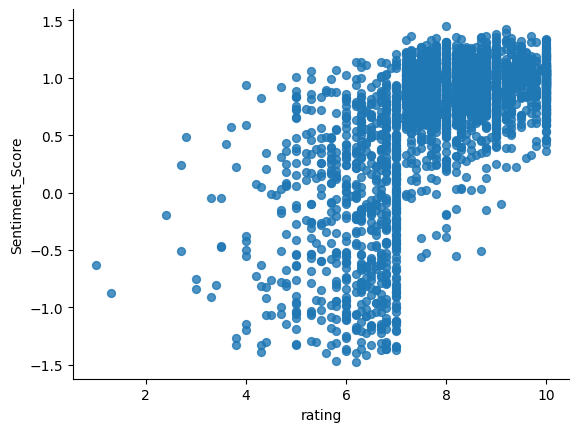

In [35]:
# @title Sentiment vs Sentiment_Score

from matplotlib import pyplot as plt
df_subset.plot(kind='scatter', x='rating', y='Sentiment_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

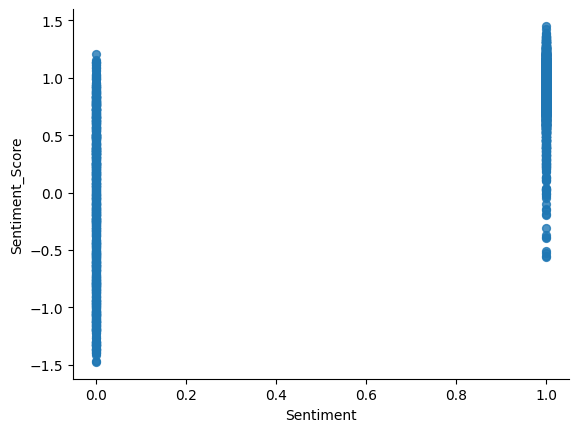

In [57]:
from matplotlib import pyplot as plt
df_subset.plot(kind='scatter', x='Sentiment', y='Sentiment_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
# Compute Pearson correlation between rescaled sentiment scores and overall rating for the subset
correlation, _ = pearsonr(df_subset['Sentiment_Score'], df_subset['rating'])
print(f"Pearson Correlation: {correlation}")

# Set a threshold for considering reviews as fake
threshold = 0.3  # Adjust this threshold as needed

Pearson Correlation: 0.6148330309282825


In [24]:
# Filter out reviews below the threshold
df_filtered = df_subset[df_subset['Sentiment_Score'] >= threshold]

# Print the head of the filtered dataset
print("Head of Filtered Dataset:")
df_filtered.head()

Head of Filtered Dataset:


,input_ids,Name,college,review,rating,Category,Sentiment,Cleaned_Review,Sentiment_Score
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...,0.789503
3,3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0,Infrastructure,1,there is ignite fest in the university held on...,0.959173
4,4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2,Infrastructure,0,the civil department is very good in this coll...,0.481198
5,5,Sannu Nandu,KCG College Of technology,The cost of the course is a little high. The c...,7.4,Placement,1,the cost of the course is a little high the co...,0.852218


In [26]:
# Compute average sentiment scores for each college in each category
avg_sentiment_df = df_subset.groupby(['college', 'Category']).agg({'Sentiment_Score': 'mean'}).reset_index()
avg_sentiment_df.head(200)

,college,Category,Sentiment_Score
0,A. P. Shah Institute of Technology - [APSIT],Infrastructure,0.493292
1,ABES Engineering College,Campus Life,-0.981120
2,ABES Engineering College,Infrastructure,0.792581
3,ABES Engineering College,Placement,0.970744
4,ABES Institute of Technology - [ABESIT],Placement,0.970077
...,...,...,...
195,Chennai Institute of Technology - [CIT],Infrastructure,1.004234
196,Chhatrapati Shahu Ji Maharaj University - [CSJMU],Placement,0.767803
197,Chitkara Institute of Engineering and Technolo...,Campus Life,0.375744
198,Chitkara Institute of Engineering and Technolo...,Infrastructure,-0.140212


In [27]:
# Add new columns for each category in the original dataset
for category in avg_sentiment_df['Category'].unique():
    category_col_name = f'{category}_Avg_Sentiment_Score'
    df = pd.merge(df_subset, avg_sentiment_df[avg_sentiment_df['Category'] == category][['college', 'Sentiment_Score']], how='left', left_on='college', right_on='college', suffixes=('', f'_{category}'))
    df.rename(columns={'Sentiment_Score': category_col_name}, inplace=True)


In [29]:
df.head(200)

,input_ids,Name,college,review,rating,Category,Sentiment,Cleaned_Review,Placement_Avg_Sentiment_Score,Sentiment_Score_Placement
0,0,Nimalraj,SNS College of Technology - [SNSCT],"The annual fee for the course is 1,25,000. Now...",6.0,Campus Life,0,the annual fee for the course is now they are...,-0.604922,0.652866
1,1,Priyaranjan kumar,Bhagalpur College of Engineering - [BCE],The hostel life and social life in this colleg...,9.7,Infrastructure,1,the hostel life and social life in this colleg...,0.938354,0.395342
2,2,Aftab Shaikh,Shree LR Tiwari College of Engineering - [SLRTCE],I chose this course because I was interested i...,8.0,Infrastructure,1,i chose this course because i was interested i...,0.789503,NaN
3,3,Shreya sneh,IILM University,There is IGNITE fest in the university held on...,10.0,Infrastructure,1,there is ignite fest in the university held on...,0.959173,1.141222
4,4,Yuv Raj Singh,Galgotias University - [GU],The civil department is very good in this coll...,6.2,Infrastructure,0,the civil department is very good in this coll...,0.481198,0.336604
...,...,...,...,...,...,...,...,...,...,...
195,195,Malti,Haldia Institute of Technology - [HIT],There is 2 Fest at Haldia Institute of Technol...,7.8,Infrastructure,1,there is fest at haldia institute of technolo...,0.871986,1.187838
196,196,Rahul Kumar yadav,St Martin's Engineering College - [SMEC],Festa like traditional day and annual day are ...,8.8,Infrastructure,1,festa like traditional day and annual day are ...,0.797482,0.979373
197,197,Tejas Diware,AISSMS Institute of Information Technology,I choose this course because I have an interes...,8.0,Infrastructure,1,i choose this course because i have an interes...,0.941207,NaN
198,198,Santoshi,KPR Institute of Engineering & Technology - [K...,KPRIET has got one of the best infrastructures...,8.0,Campus Life,1,kpriet has got one of the best infrastructures...,1.310782,NaN


In [ ]:
# new_df = pd.DataFrame(columns=['new_id', 'college'] + list(avg_sentiment_df['Category'].unique()))

# # Fill 'new_id' and 'college' columns
# new_df['new_id'] = range(1, len(new_df) + 1)
# new_df['college'] = new_df['college']

# # Fill sentiment score columns
# for idx, row in new_df.iterrows():
#     college = row['college']
#     for category in avg_sentiment_df['Category'].unique():
#         avg_score = avg_sentiment_df[(avg_sentiment_df['College'] == college) & (avg_sentiment_df['Category'] == category)]['Sentiment_Score'].iloc[0]
#         new_df.loc[idx, category] = avg_score

In [ ]:
# new_df.head()

In [36]:
# One-hot encode the 'Category' column
df_encoded = pd.get_dummies(df_subset['Category'])

# Concatenate the one-hot encoded columns with the original dataframe
df_association = pd.concat([df_subset, df_encoded], axis=1)


In [38]:
# Discretize Sentiment_Score into binary values
threshold = 0.0  # Adjust the threshold as needed
df_association['Sentiment_Score_Binary'] = (df_association['Sentiment_Score'] >= threshold).astype(int)

# Extract relevant columns for association rule mining
association_data = df_association[['Placement', 'Campus Life', 'Infrastructure', 'Sentiment_Score_Binary']]

# Apply Apriori algorithm
frequent_itemsets = apriori(association_data, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display association rules
print("Association Rules:")
print(rules)


Association Rules:
        antecedents               consequents  antecedent support  \
0       (Placement)  (Sentiment_Score_Binary)            0.474667   
1  (Infrastructure)  (Sentiment_Score_Binary)            0.435000   

   consequent support  support  confidence      lift  leverage  conviction  \
0            0.862667    0.420    0.884831  1.025693  0.010521    1.192455   
1            0.862667    0.372    0.855172  0.991313 -0.003260    0.948254   

   zhangs_metric  
0       0.047684  
1      -0.015274  


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [55]:
# Set your minimum support and confidence thresholds
min_support_threshold = 0.05
min_confidence_threshold = 0.7

# Initialize a dictionary to store results for each category
college_results = {}

# Iterate through each unique college
for college in df_association['college'].unique():
    # Extract relevant data for the current college
    college_data = df_association[df_association['college'] == college]
    
    # Apply Apriori algorithm with a lower support threshold
    frequent_itemsets = apriori(college_data[['Sentiment_Score_Binary']], min_support=min_support_threshold, use_colnames=True)
    
    # Generate association rules with confidence
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)
    
    # Filter rules for the current college
    filtered_rules = rules[rules['consequents'].apply(lambda x: 'Sentiment_Score_Binary' in x)].copy()
    
    # Compute support manually based on the number of occurrences of antecedents
    filtered_rules['manual_support'] = filtered_rules.apply(lambda row: row['confidence'] * len(college_data) / len(df_association), axis=1)
    
    # Sort rules by manual_support in descending order
    sorted_rules = filtered_rules.sort_values(by='manual_support', ascending=False)
    
    # Extract associated categories and support values
    associated_categories = sorted_rules['antecedents'].apply(lambda x: [item for item in x]).tolist()
    support_values = sorted_rules['manual_support'].tolist()
    
    # Create a table for the current college
    college_table = pd.DataFrame({
        'Associated_Categories': associated_categories,
        'Support': support_values
    })
    
    # Store the table in the dictionary
    college_results[college] = college_table

# Display the results
for college, table in college_results.items():
    print(f"College: {college}")
    print(table)
    print("\n")


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: Cannot set a DataFrame with multiple columns to the single column manual_support

In [99]:
grouped_df = df_exploded.groupby(['college', 'Categories']).agg({'Sentiment_Score': 'mean'}).reset_index()

# Pivot the table to get categories as columns
pivot_df = grouped_df.pivot(index='college', columns='Categories', values='Sentiment_Score').reset_index()

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

# Calculate the weighted average sentiment score based on priority
pivot_df['Weighted_Score'] = (
    0.5 * pivot_df['Placement'] +
    0.3 * pivot_df['Campus Life'] +
    0.2 * pivot_df['Infrastructure']
)

# Sort the dataframe based on the weighted score in descending order
sorted_df = pivot_df.sort_values(by='Weighted_Score', ascending=False)

# Select and rename columns for the final output
output_df = sorted_df[['college', 'Placement', 'Campus Life', 'Infrastructure']]

# Rename columns for better clarity
output_df.columns = ['College Name', 'Avg_Sentiment_Score_Placements', 'Avg_Sentiment_Score_Campus_Life', 'Avg_Sentiment_Score_Infrastructure']

# Display the final output table
print(output_df)


excel_file_path = r'C:\Users\USER\Desktop\xyz\timent_scores_by_college_new.xlsx'

# Save the sorted table to an Excel file
output_df.to_excel(excel_file_path, index=False)

print(f"Results saved to {excel_file_path}")

                                          College Name  \
452  Mar Baselios College of Engineering and Techno...   
284  IIT Hyderabad - Indian Institute of Technology...   
327  International Institute of Information Technol...   
49                Army Institute of Technology - [AIT]   
585                              SR University - [SRU]   
..                                                 ...   
360     K. Ramakrishnan College of Engineering -[KRCE]   
528        Prayag Institute of Technology & Management   
247              Guru Ghasidas Vishwavidyalaya - [GGU]   
296                                        IPS Academy   
433  Maharaja Ranjit Singh Punjab Technical University   

     Avg_Sentiment_Score_Placements  Avg_Sentiment_Score_Campus_Life  \
452                        1.302848                         1.302848   
284                        1.231530                         1.198527   
327                        1.199307                         1.199307   
49             

In [107]:
grouped_df = df_exploded.groupby(['college', 'Categories']).agg({'Sentiment_Score': 'mean'}).reset_index()

# Pivot the table to get categories as columns
pivot_df = grouped_df.pivot(index='college', columns='Categories', values='Sentiment_Score').reset_index()

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

# Calculate the weighted average sentiment score based on priority
pivot_df['Weighted_Score'] = (
    0.4 * pivot_df['Placement'] +
    0.2 * pivot_df['Campus Life'] +
    0.1 * pivot_df['Infrastructure'] +
    0.15 * pivot_df['Quality of Education'] +
    0.1 * pivot_df['Research Collaboration'] +
    0.05 * pivot_df['Outreach Program'] +
    0.05 * pivot_df['Collaborative with Different Countries'] +
    0.05 * pivot_df['Examination Pattern']
)

# Sort the dataframe based on the weighted score in descending order
sorted_df = pivot_df.sort_values(by='Weighted_Score', ascending=False)

# Select and rename columns for the final output
output_df = sorted_df[['college', 'Placement', 'Campus Life', 'Infrastructure', 'Quality of Education', 'Research Collaboration', 'Outreach Program', 'Collaborative with Different Countries', 'Examination Pattern']]

# Rename columns for better clarity
output_df.columns = ['College Name', 'Avg_Sentiment_Score_Placements', 'Avg_Sentiment_Score_Campus_Life', 'Avg_Sentiment_Score_Infrastructure', 'Avg_Sentiment_Score_Quality_of_Education', 'Avg_Sentiment_Score_Research_Collaboration', 'Avg_Sentiment_Score_Outreach_Program', 'Avg_Sentiment_Score_Collaborative_with_Different_Countries', 'Avg_Sentiment_Score_Examination_Pattern']

# Display the final output table
print(output_df)

excel_file_path = r'C:\Users\USER\Desktop\xyz\timent_scores_by_college_new_1.xlsx'

# Save the sorted table to an Excel file
output_df.to_excel(excel_file_path, index=False)

print(f"Results saved to {excel_file_path}")


                                          College Name  \
286  IIT Hyderabad - Indian Institute of Technology...   
733                         VIT University - [VIT- AP]   
49                Army Institute of Technology - [AIT]   
154                 Dayananda Sagar University - [DSU]   
592                              SR University - [SRU]   
..                                                 ...   
248              Guru Ghasidas Vishwavidyalaya - [GGU]   
390  Kelappaji College of Agricultural Engineering ...   
519  Pandit Deendayal Petroleum University, School ...   
298                                        IPS Academy   
436  Maharaja Ranjit Singh Punjab Technical University   

     Avg_Sentiment_Score_Placements  Avg_Sentiment_Score_Campus_Life  \
286                        1.231530                         1.198527   
733                        1.017255                         1.167136   
49                         1.188042                         1.188042   
154            